# Useful Tools to Help How You Code Python

## Debugging in Jupyter

In [7]:
from IPython.core.debugger import set_trace

def count_down_from(number):
    for i in range(number):
        steps_left = number - i
        set_trace()  # Use set_trace to set a breakpoint within your code
        print(steps_left)

# count_down_from(4)    # <---------- uncomment to try debugger

# Once in the debugger, use quit to exit and help for more information

## Data handling with Pandas

In [9]:
import pandas as pd
iris = pd.read_csv('IRIS.csv')
iris.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
129,7.2,3.0,5.8,1.6,Iris-virginica
31,5.4,3.4,1.5,0.4,Iris-setosa
106,4.9,2.5,4.5,1.7,Iris-virginica


In [11]:
iris['sepal_area'] = iris['sepal_length']*iris['sepal_width']
iris.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area
111,6.4,2.7,5.3,1.9,Iris-virginica,17.28
29,4.7,3.2,1.6,0.2,Iris-setosa,15.04
131,7.9,3.8,6.4,2.0,Iris-virginica,30.02


## Plotting with Matplotlib

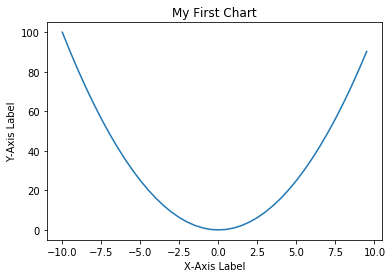

In [18]:
import matplotlib.pyplot as plt

# Create some data
xdata = [i/2 for i in range(-20, 20)]
ydata = [x**2 for x in xdata]

plt.plot(xdata, ydata)
plt.xlabel("X-Axis Label")
plt.ylabel("Y-Axis Label")
plt.title('My First Chart')
plt.show()

## Data visualisation with Seaborn

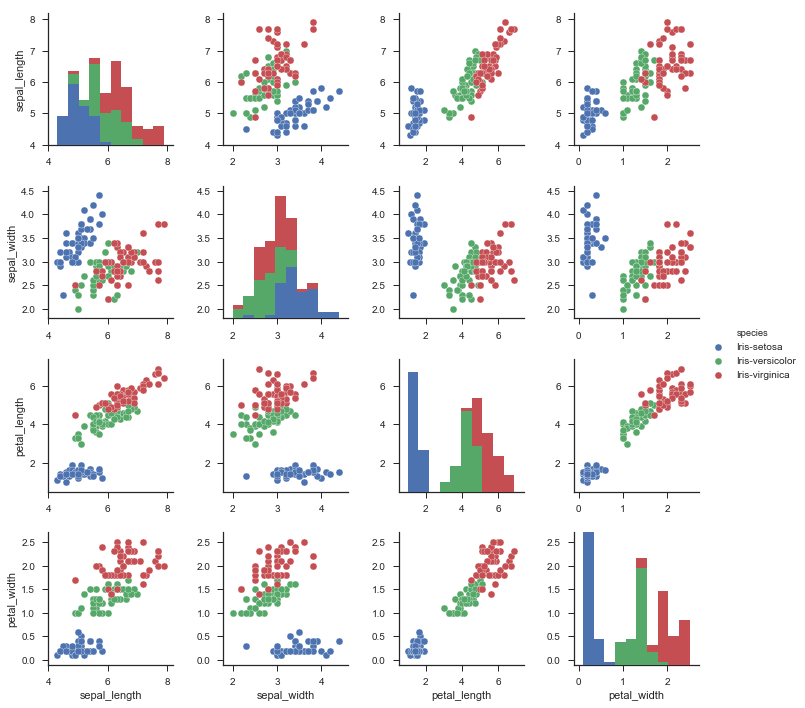

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks")

sns.pairplot(iris, hue="species")
plt.show()

## Configuring Plots with Pylustrator

In [21]:
# pylustrator must run in a script file
%run pylustrator_example.py

save fig = plt.figure(1) to \\customer\userdat$\crawley\Sheeh1S\EDF Energy\Coding Workshops\2. Python\pylustrator_example.py line 14-19
save fig = plt.figure(1) to \\customer\userdat$\crawley\Sheeh1S\EDF Energy\Coding Workshops\2. Python\pylustrator_example.py line 14-19
save fig = plt.figure(1) to \\customer\userdat$\crawley\Sheeh1S\EDF Energy\Coding Workshops\2. Python\pylustrator_example.py line 14-19


## Vectorising Code

In [41]:
### Element-wise sum of two lists in Pure Python

list_A = [i for i in range(100)]
list_B = [2*i+3 for i in range(100)]

numpy_A = np.array(list_A)
numpy_B = np.array(list_B)

def add_lists_python(list_1, list_2):
    return [element_1 + element_2 for element_1, element_2 in zip(list_1, list_2)]

def add_lists_numpy(list_1, list_2):
    return list_1 + list_2


In [39]:
%timeit add_lists_python(list_A, list_B)

9.05 µs ± 678 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [40]:
%timeit add_lists_numpy(numpy_A, numpy_B)

778 ns ± 100 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


## Code Profiling with profile, cProfile, time and timeit

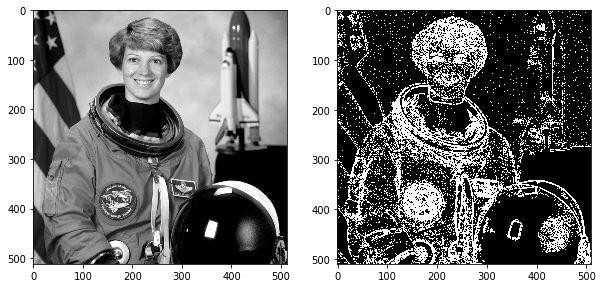

In [3]:
# This section is based on this blog post: https://flothesof.github.io/optimizing-python-code-numpy-cython-pythran-numba.html
import numpy as np
import matplotlib.pyplot as plt
import skimage.data
import skimage.color

image = skimage.data.astronaut()
image = skimage.color.rgb2gray(image)

def compare(left, right):
    """Compares two images, left and right."""
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(left, cmap='gray')
    ax[1].imshow(right, cmap='gray')
    plt.show()

def laplace_numpy(image):
    """Applies Laplace operator to 2D image using our own NumPy implementation. 
    Then tresholds the result and returns boolean image."""
    laplacian = image[:-2, 1:-1] + image[2:, 1:-1] + image[1:-1, :-2] + image[1:-1, 2:] - 4*image[1:-1, 1:-1]
    thresh = np.abs(laplacian) > 0.05
    return thresh

compare(image, laplace_numpy(image))

#### Use ```%prun``` to profile a single line of code

In [22]:
%prun laplace_numpy(image)

         4 function calls in 0.016 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.015    0.015    0.015    0.015 <ipython-input-3-3b6218b0d595>:17(laplace_numpy)
        1    0.001    0.001    0.016    0.016 <string>:1(<module>)
        1    0.000    0.000    0.016    0.016 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}

#### Use ```%time``` to measure once the execution time of one line of code

In [27]:
%time bool_array = laplace_numpy(image)

Wall time: 14 ms


#### Use ```%timeit``` to get the average execution time over multiple runs for one line of code

In [28]:
%timeit laplace_numpy(image)

10.1 ms ± 467 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### We can now quanitfy the improvement in speed when introducing Numba's Just-In-Time compiler

In [30]:
from numba import jit

@jit
def laplace_numba(image):
    """Laplace operator in NumPy for 2D images. Accelerated using numba."""
    laplacian = image[:-2, 1:-1] + image[2:, 1:-1] + image[1:-1, :-2] + image[1:-1, 2:] - 4*image[1:-1, 1:-1]
    thresh = np.abs(laplacian) > 0.05
    return thresh

In [31]:
%timeit laplace_numba(image)

4.36 ms ± 1.27 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


**Using Numba's JIT feature cuts the runtime of the Laplacian transform by 50%**

But it is always worth profiling code to check that you actually have a performance enhancement:

In [45]:
@jit
def add_lists_numba(list_1, list_2):
    return list_1 + list_2

%timeit add_lists_numba(numpy_A, numpy_B)

1.37 µs ± 153 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


Compared with the numpy list addition, in that case numpy was much faster